In [2]:
import autoregressive
import pyhsmm
import h5py
from moviepy.video.io.bindings import mplfig_to_npimage
from moviepy.editor import VideoClip
from pylab import *
import seaborn as sns
import autoregressive.models as m
import autoregressive.distributions as d
from pyhsmm.util.text import progprint_xrange
%matplotlib inline

In [3]:
def loadh5(fname):
    f = h5py.File(fname, 'r')
    return f

def whiten(X):
    return (X-mean(X))/std(X)

In [4]:
song = loadh5('../songSegmenter/dat/PS_20130625111709_ch3.mat')

In [5]:
song.get('Pulses/AmpCull/fcmx')

<HDF5 dataset "fcmx": shape (16480, 1), type "<f8">

In [6]:
X = song.get('Data/d').value[0]

In [7]:
data = np.array([X]).T

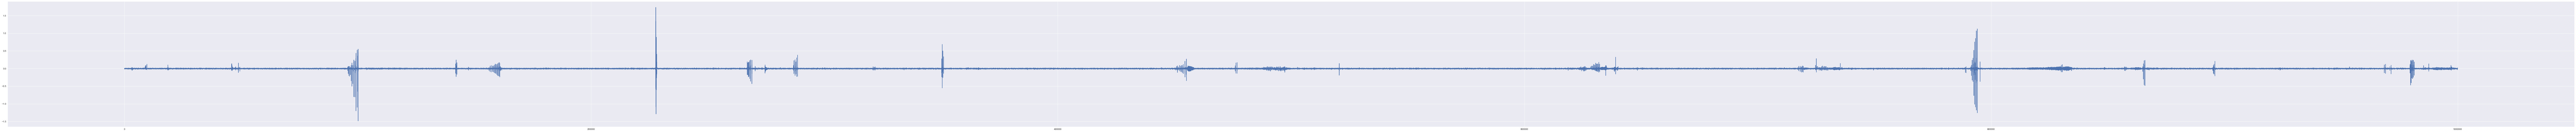

In [85]:
figure(figsize=(200,10))
plot(data[:1000000])

In [17]:
Nmax = 5
affine = True
nlags = 3
D_obs=1# Construct a standard AR-HMM for fitting
model = m.ARWeakLimitStickyHDPHMM(
        alpha=4., gamma=4., kappa=10., 
        init_state_distn='uniform',
        obs_distns=[
            d.AutoRegression(
                nu_0=3,
                S_0=np.eye(D_obs),
                M_0=np.hstack((np.eye(D_obs), np.zeros((D_obs, D_obs*(nlags-1)+affine)))),
                K_0=np.eye(D_obs*nlags+affine),
                affine=affine)
            for state in range(Nmax)],
        )


model.add_data(data[:1000000])

In [18]:
for i in progprint_xrange(200):
    model.resample_model()

.........................  [  25/200,    1.62sec avg, ETA 04:43 ]
.........................  [  50/200,    1.74sec avg, ETA 04:21 ]
.........................  [  75/200,    1.75sec avg, ETA 03:39 ]
.........................  [ 100/200,    1.76sec avg, ETA 02:56 ]
.........................  [ 125/200,    1.71sec avg, ETA 02:08 ]
.........................  [ 150/200,    1.74sec avg, ETA 01:27 ]
.........................  [ 175/200,    1.74sec avg, ETA 43.59 ]
.........................  [ 200/200,    1.81sec avg, ETA 0.00 ]

   1.81sec avg, 06:01 total



In [22]:
%matplotlib inline
_, stateseq = model.predict(np.array([X]).T, 0)


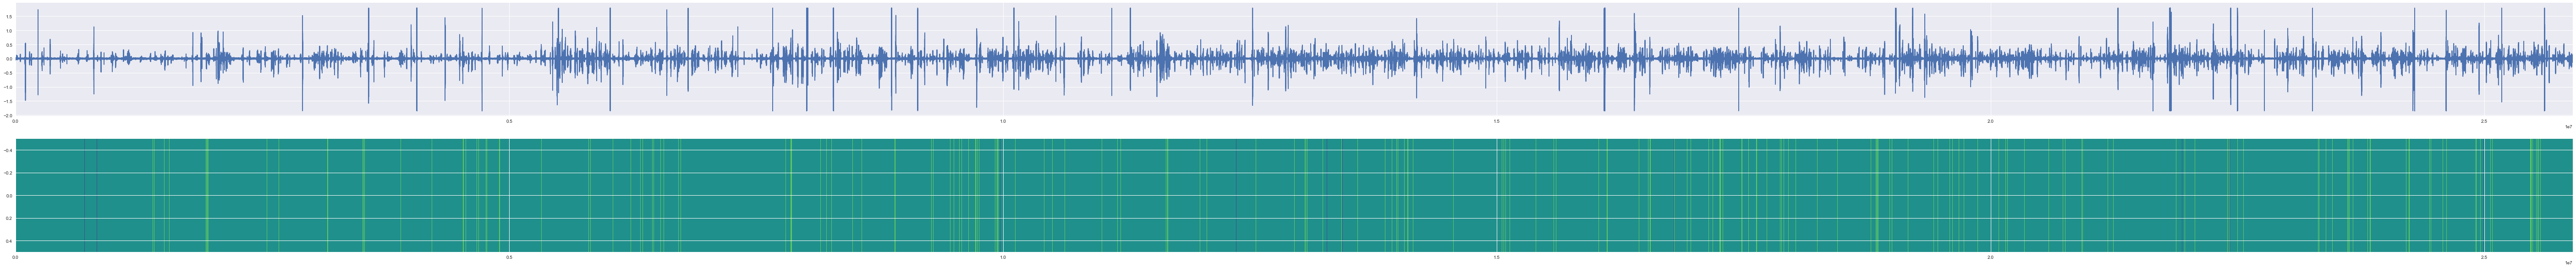

In [27]:
figure(figsize=(100,10))
subplot(2,1,1)
plot(data)
xlim(0, data.shape[0])
subplot(2,1,2)
imshow(array([stateseq]), aspect='auto',cmap='viridis')


In [29]:
cp = model.copy_sample()
for s in cp.states_list:
    s.data = None

In [30]:
import pickle
with open("./arhmm-nonwhitened-1milldatapoints", 'w') as modelf:
    pickle.dump(model, modelf)
    modelf.close()  

In [ ]:
Nmax = 3
affine = True
nlags = 3
D_obs=1# Construct a standard AR-HMM for fitting
model = m.ARWeakLimitStickyHDPHMM(
        alpha=4., gamma=4., kappa=10., 
        init_state_distn='uniform',
        obs_distns=[
            d.AutoRegression(
                nu_0=3,
                S_0=np.eye(D_obs),
                M_0=np.hstack((np.eye(D_obs), np.zeros((D_obs, D_obs*(nlags-1)+affine)))),
                K_0=np.eye(D_obs*nlags+affine),
                affine=affine)
            for state in range(Nmax)],
        )


model.add_data(data[:1000000])